In [ ]:
#@title Test Project
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import cv2



In [ ]:
# Test loading dataset using Pandas
import pandas as pd

df = pd.read_parquet("hf://datasets/bghira/photo-concept-bucket/photo-concept-bucket.parquet")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Test loading Kaggle dataset
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("soumikrakshit/div2k-high-resolution-images")

print("Path to dataset files:", path)

100%|██████████| 3.71G/3.71G [02:54<00:00, 22.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1


In [ ]:
from os import walk

w = walk(path)
for (dirpath, dirnames, filenames) in w:
    print(dirpath, dirnames, filenames, sep='\t|\t')

/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1	|	['DIV2K_train_HR', 'DIV2K_valid_HR']	|	[]
/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1/DIV2K_train_HR	|	['DIV2K_train_HR']	|	[]
/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1/DIV2K_train_HR/DIV2K_train_HR	|	[]	|	['0719.png', '0608.png', '0084.png', '0478.png', '0691.png', '0048.png', '0633.png', '0520.png', '0656.png', '0744.png', '0018.png', '0235.png', '0379.png', '0667.png', '0450.png', '0511.png', '0227.png', '0544.png', '0506.png', '0466.png', '0212.png', '0567.png', '0785.png', '0653.png', '0451.png', '0471.png', '0762.png', '0442.png', '0257.png', '0119.png', '0260.png', '0750.png', '0364.png', '0568.png', '0076.png', '0698.png', '0272.png', '0658.png', '0210.png', '0163.png', '0602.png', '0577.png', '0239.png', '0355.png', '0161.png', '0335.png', '0259.png', '0213.png', '0726.png', '0481.png', '0533.png', '0687.p

In [ ]:
path = "/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1"

In [ ]:
# Data Preparation: Load images and create low-resolution versions
def load_images(path, img_size=(256, 256)):
    images = []
    for dirpath, _, filenames in os.walk(path):
        for file in filenames:
            if file.endswith(".png") or file.endswith(".jpg"):
                img_path = os.path.join(dirpath, file)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size)
                images.append(img)
    return np.array(images)

In [ ]:
# Verify if the path exists and list the files
if os.path.exists(path):
    print("Path exists. Listing files in the directory:")
    for dirpath, _, filenames in os.walk(path):
        for file in filenames[:5]:  # List the first 5 files only
            print(os.path.join(dirpath, file))
else:
    print("Path does not exist. Please check the path.")

# Attempt to load a single image from the path
try:
    sample_images = load_images(path, img_size=(256, 256))
    if len(sample_images) > 0:
        print("Successfully loaded images.")
        plt.imshow(sample_images[0])
        plt.title("Sample Loaded Image")
        plt.show()
    else:
        print("No images were found in the specified path.")
except Exception as e:
    print(f"An error occurred while loading images: {e}")


Path exists. Listing files in the directory:
/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1/DIV2K_train_HR/DIV2K_train_HR/0719.png
/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1/DIV2K_train_HR/DIV2K_train_HR/0608.png
/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1/DIV2K_train_HR/DIV2K_train_HR/0084.png
/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1/DIV2K_train_HR/DIV2K_train_HR/0478.png
/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1/DIV2K_train_HR/DIV2K_train_HR/0691.png
/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1/DIV2K_valid_HR/DIV2K_valid_HR/0829.png
/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versions/1/DIV2K_valid_HR/DIV2K_valid_HR/0854.png
/root/.cache/kagglehub/datasets/soumikrakshit/div2k-high-resolution-images/versi

KeyboardInterrupt: 

In [ ]:
#Load the high res images
hr_images = load_images(path)

In [ ]:
#function to create low-res images

def create_low_res(hr_images, scale = 2):
  lr_images = []
  for img in hr_images:
    lr_img = cv2.resize(img, (img.shape[1] // scale, img.shape[0] // scale), interpolation=cv2.INTER_CUBIC)
    lr_img = cv2.resize(lr_img, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
    lr_images.append(lr_img)
  return np.array(lr_images)


# Extract patches from images
def extract_patches(images, patch_size=64, stride=32):
    patches = []
    for img in images:
        for i in range(0, img.shape[0] - patch_size + 1, stride):
            for j in range(0, img.shape[1] - patch_size + 1, stride):
                patch = img[i:i + patch_size, j:j + patch_size]
                patches.append(patch)
    return np.array(patches)

In [ ]:
#create low res images
lr_images = create_low_res(hr_images)


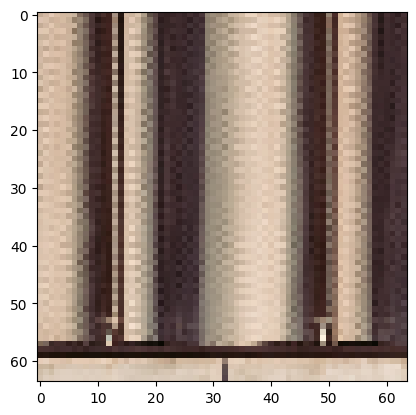

In [ ]:
# Extract patches from high-resolution and low-resolution images
hr_patches = extract_patches(hr_images)
lr_patches = extract_patches(lr_images)
plt.imshow(hr_patches[0])
plt.show()

In [ ]:
# # Show 5 sample images after creating low-resolution versions
# for i in range(5):
#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     plt.title("High Resolution")
#     plt.imshow(hr_images[i])
#     plt.subplot(1, 2, 2)
#     plt.title("Low Resolution")
#     plt.imshow(lr_images[i])
#     plt.show()

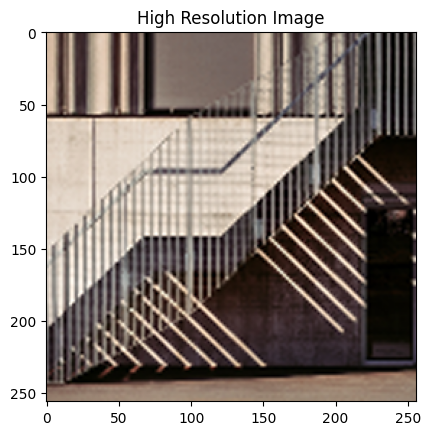

In [ ]:


if np.max(lr_images) > 1:
    hr_images = hr_images / 255.0
    lr_images = lr_images / 255.0

plt.imshow(lr_images[0])
plt.title("High Resolution Image")
plt.show()


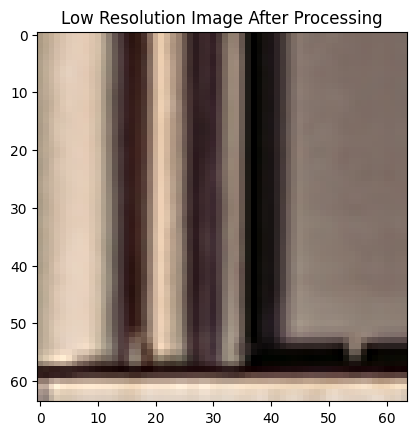

In [ ]:
plt.imshow(lr_patches[1])
plt.title("Low Resolution Image After Processing")
plt.show()

In [ ]:
# Normalize the patches to [0, 1] range
lr_patches = lr_patches / 255.0
hr_patches = hr_patches / 255.0


In [ ]:
import requests

def send_ifttt_notification(event, value1=""):
    url = f"https://maker.ifttt.com/trigger/training_complete/with/key/i1te1NagEWVI-lDcr65kXcgZzcobYOt3osdP3CkRAdD"
    data = {"value1": value1}
    requests.post(url, json=data)

# Call this function after training completes
final_val_loss = 2

# Send a notification with the final validation loss
send_ifttt_notification("training_complete", f"Your SRCNN model has finished training. Final validation loss: {final_val_loss}")


In [ ]:
def build_srcnn():
    input_layer = layers.Input(shape=(None, None, 3))

    # Initial large kernel for broader feature extraction
    x = layers.Conv2D(64, (9, 9), activation='relu', padding='same', kernel_initializer='he_normal')(input_layer)
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='same', kernel_initializer='he_normal')(x)

    # Deeper layers with varied filter numbers for more detailed features
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='sigmoid', padding='same', kernel_initializer='he_normal')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='sigmoid', padding='same', kernel_initializer='he_normal')(x)

    # Adding more depth with skip connections
    skip = x
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.Conv2D(256, (3, 3), activation='sigmoid', padding='same', kernel_initializer='he_normal')(x)
    x = layers.Add()([x, skip])  # Residual connection

    # Final convolution layers to reconstruct the output
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same', kernel_initializer='he_normal')(x)
    output_layer = layers.Conv2D(3, (5, 5), activation='sigmoid', padding='same')(x)

    return models.Model(inputs=input_layer, outputs=output_layer)

# Build model
srcnn = build_srcnn()
optimizer = optimizers.Adam(learning_rate=1e-6)

# Loss function: Mean Squared Error (simpler than perceptual loss)
srcnn.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Training parameters
batch_size = 128
steps_per_epoch = len(lr_patches) // batch_size

# Add early stopping and model checkpoint for training stability
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, min_lr=1e-8)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('srcnn_checkpoint.weights.h5', monitor='loss', save_best_only=True, save_weights_only=True)

# Training the model
history = srcnn.fit(
    tf.data.Dataset.from_tensor_slices((lr_patches, hr_patches)).batch(batch_size).repeat(),
    epochs=500,
    steps_per_epoch=steps_per_epoch,
    validation_data=(lr_patches[:batch_size], hr_patches[:batch_size]),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
)

# Get the final validation loss
final_val_loss = history.history['val_mean_squared_error'][-1]
srcnn.load_weights('srcnn_checkpoint.weights.h5')
# Save the entire model once training is complete
srcnn.save('srcnn_final_model.h5')

# Send a notification with the final validation loss
send_ifttt_notification("training_complete", f"Your SRCNN model has finished training. Final validation loss: {final_val_loss}")



Epoch 1/500
344/344 ━━━━━━━━━━━━━━━━━━━━ 80s 131ms/step - loss: 0.0835 - mean_squared_error: 0.0835 - val_loss: 0.0629 - val_mean_squared_error: 0.0629 - learning_rate: 1.0000e-06
Epoch 2/500
344/344 ━━━━━━━━━━━━━━━━━━━━ 61s 125ms/step - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0397 - val_mean_squared_error: 0.0397 - learning_rate: 1.0000e-06
Epoch 3/500
344/344 ━━━━━━━━━━━━━━━━━━━━ 43s 125ms/step - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0313 - val_mean_squared_error: 0.0313 - learning_rate: 1.0000e-06
Epoch 4/500
344/344 ━━━━━━━━━━━━━━━━━━━━ 43s 125ms/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0265 - val_mean_squared_error: 0.0265 - learning_rate: 1.0000e-06
Epoch 5/500
344/344 ━━━━━━━━━━━━━━━━━━━━ 43s 125ms/step - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0235 - val_mean_squared_error: 0.0235 - learning_rate: 1.0000e-06
Epoch 6/500
344/344 ━━━━━━━━━━━━━━━━━━━━ 43s 125ms/step - loss: 0.0243 - mean_squared_error: 0.0243 

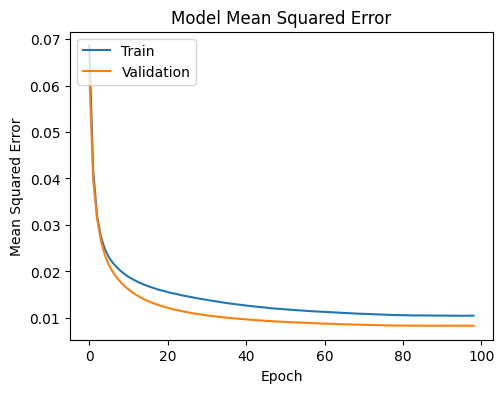

In [ ]:
# # Plot accuracy and loss
# plt.figure(figsize=(12, 4))

# # Plot training & validation accuracy values
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Validation'], loc='upper left')

# # # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Validation'], loc='upper right')

# plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
# Evaluate the model and plot multiple samples
def plot_samples(lr_images, hr_images, sr_images):
    num_samples = len(lr_images)
    for i in range(num_samples):
        lr = lr_images[i]
        hr = hr_images[i]
        sr = sr_images[i]

        # Ensure the output image is properly scaled to [0, 1] range if needed
        sr = np.clip(sr, 0, 1)

        # Plot the LR, HR, and SR images side by side
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 3, 1)
        plt.title("Low Resolution", fontsize=16)
        plt.imshow(lr)
        plt.axis('off')  # Remove axes for better visualization

        plt.subplot(1, 3, 2)
        plt.title("High Resolution", fontsize=16)
        plt.imshow(hr)
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title("Super Resolved", fontsize=16)
        plt.imshow(sr)
        plt.axis('off')

        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()

In [ ]:
# Test the model on multiple sample patches
sample_lr = lr_patches[10:15]  # Selecting 5 low-resolution patches
sample_hr = hr_patches[10:15]  # Selecting the corresponding 5 high-resolution patches

# Predict the super-resolved images
sample_sr = srcnn.predict(sample_lr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
# Clip or normalize the output images to [0, 1] range
sample_sr = np.clip(sample_sr, 0, 1).astype(np.float32)


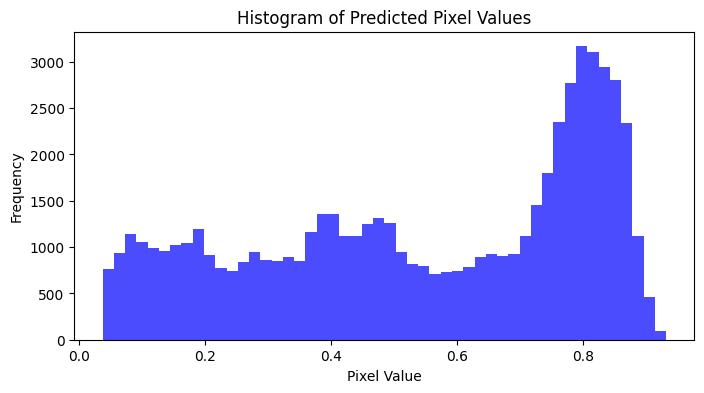

In [ ]:
# Plot the histogram of predicted pixel values
plt.figure(figsize=(8, 4))
plt.hist(sample_sr.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

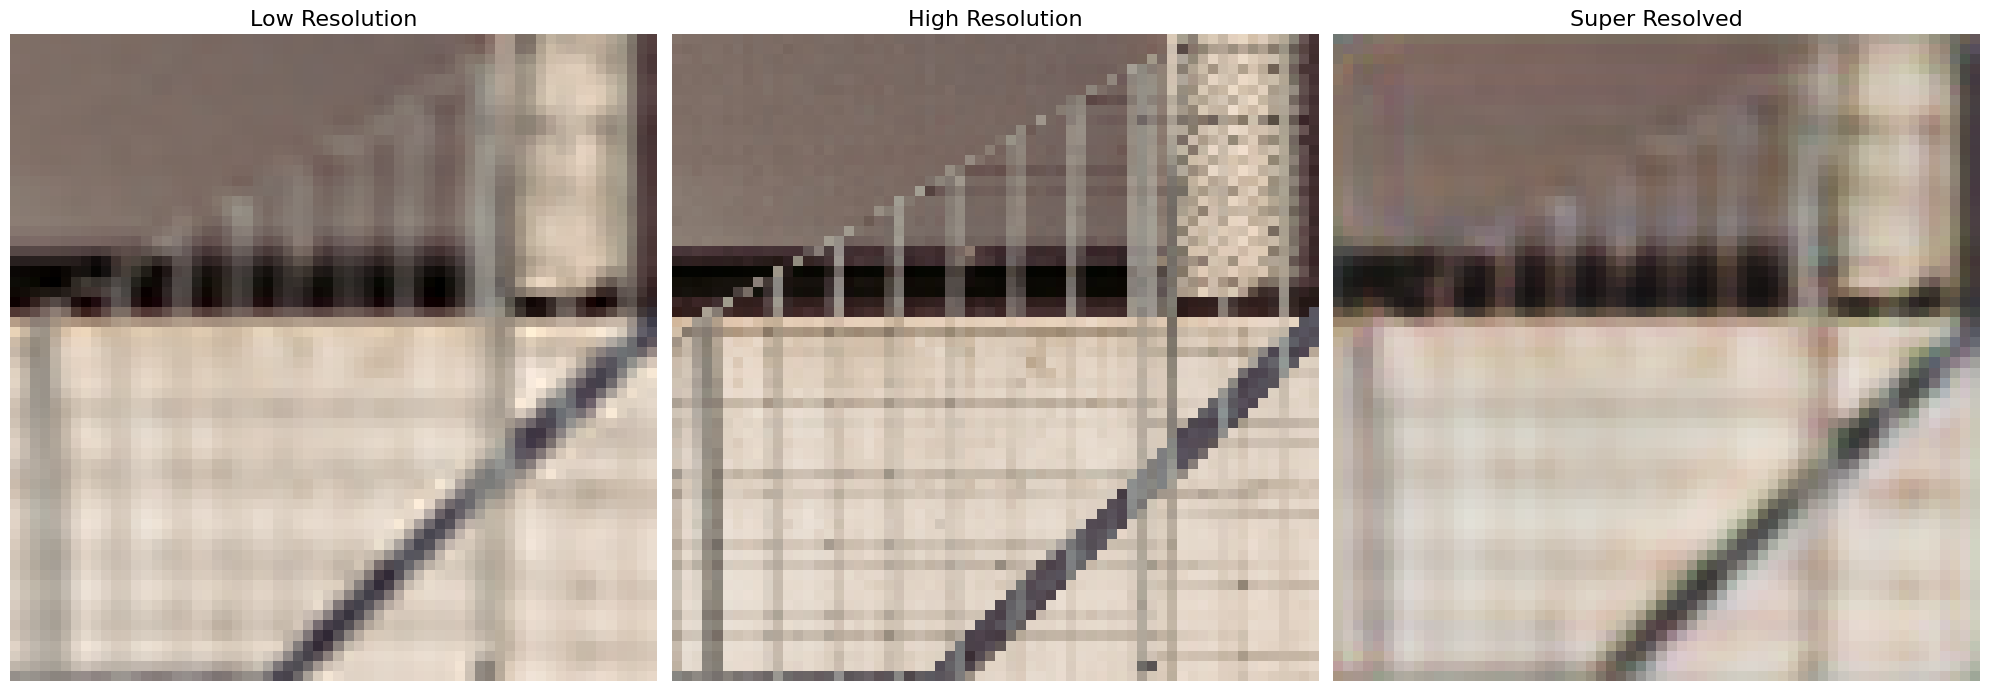

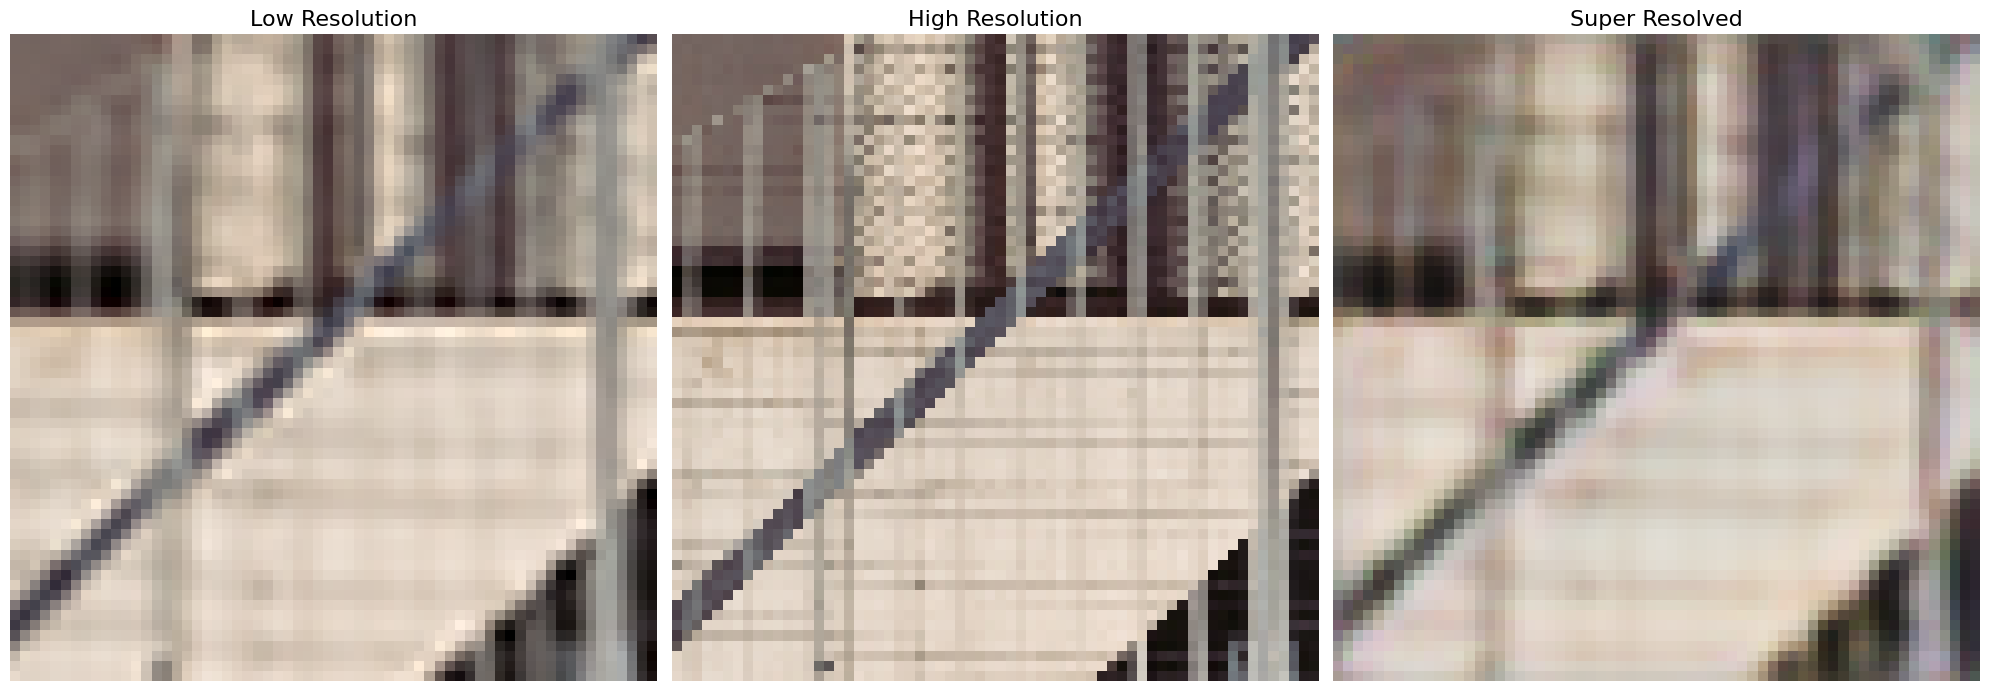

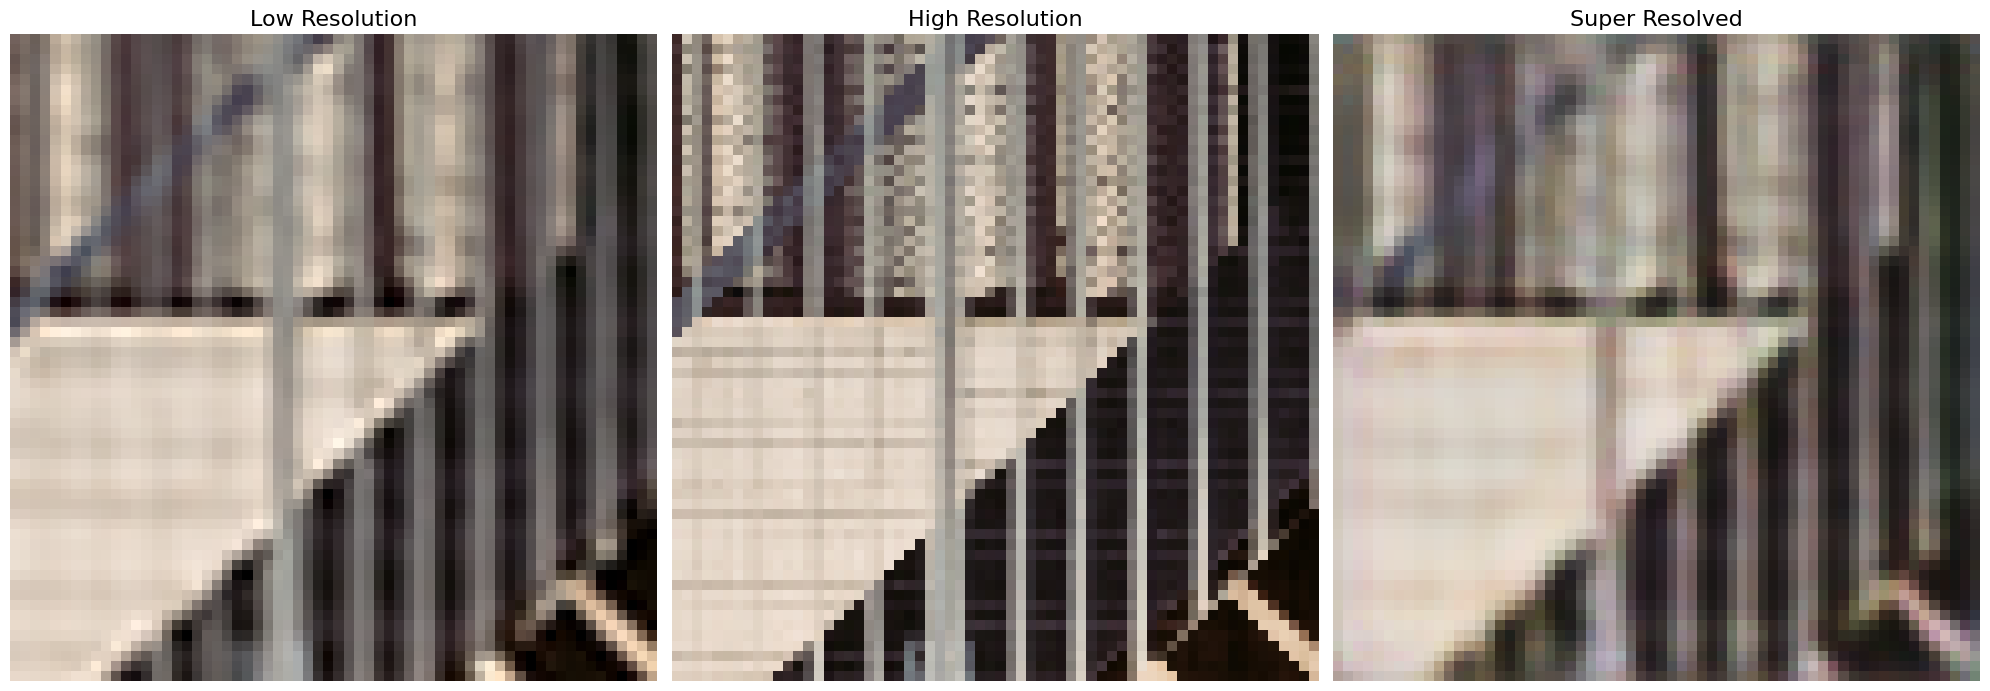

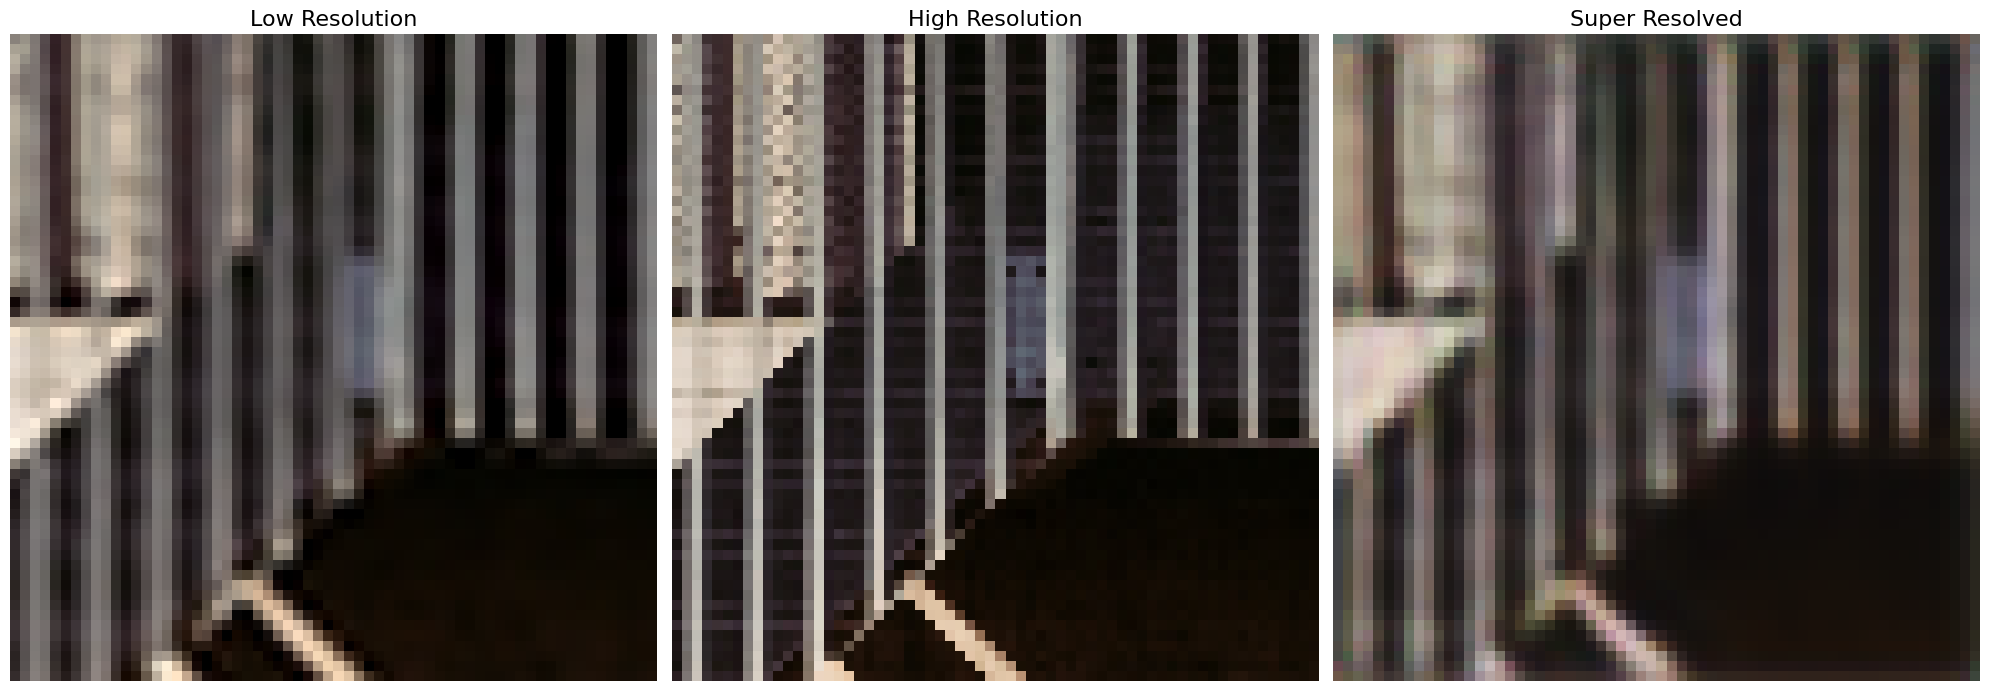

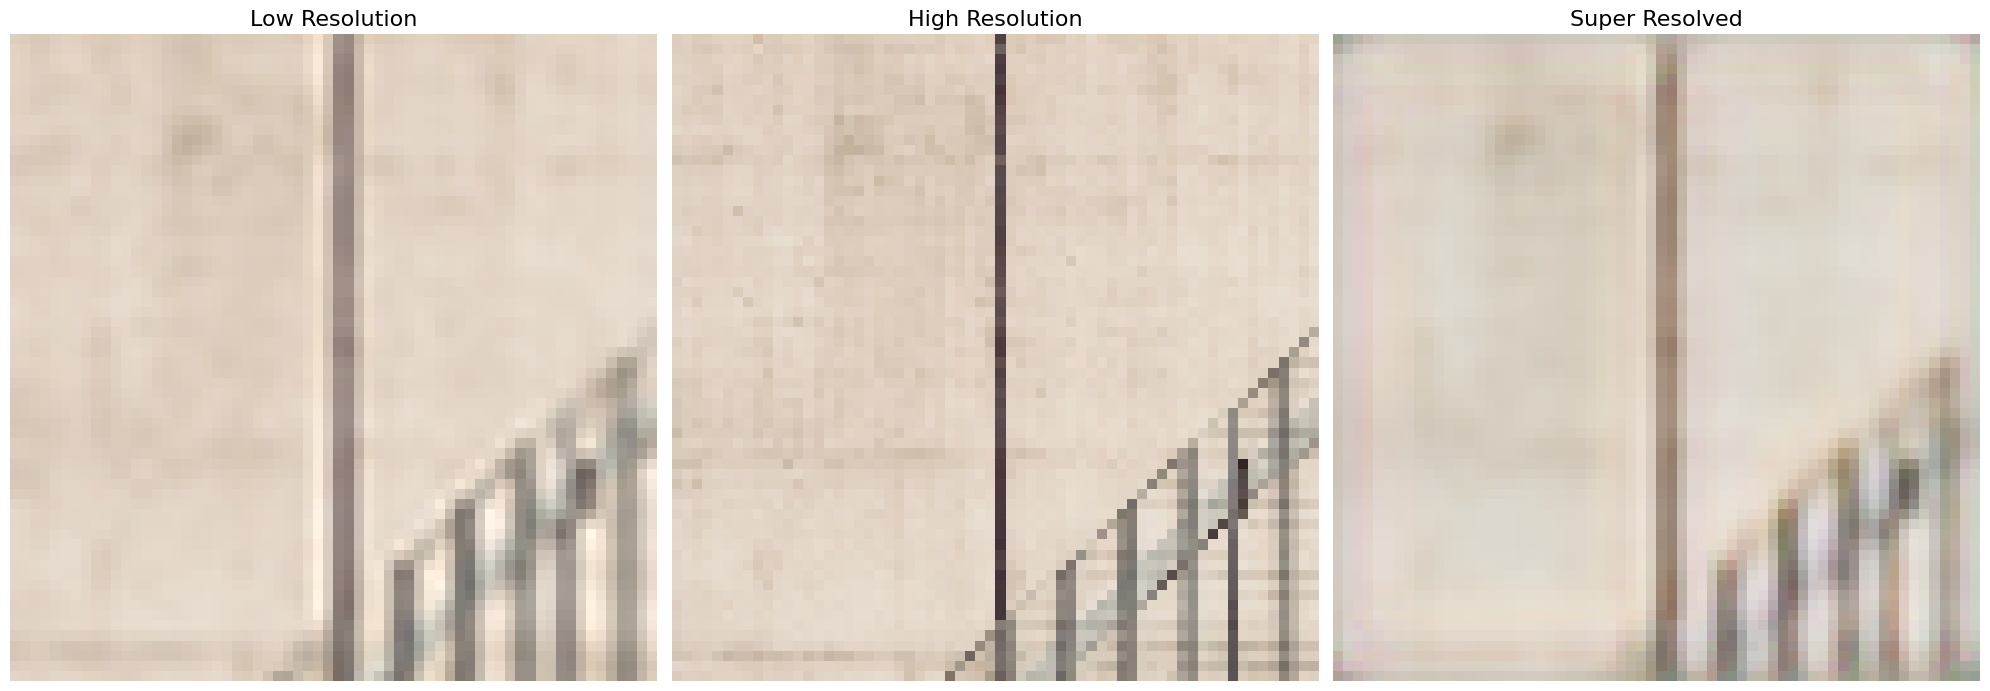

In [ ]:
# Call the function with the predicted samples
plot_samples(sample_lr, sample_hr, sample_sr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


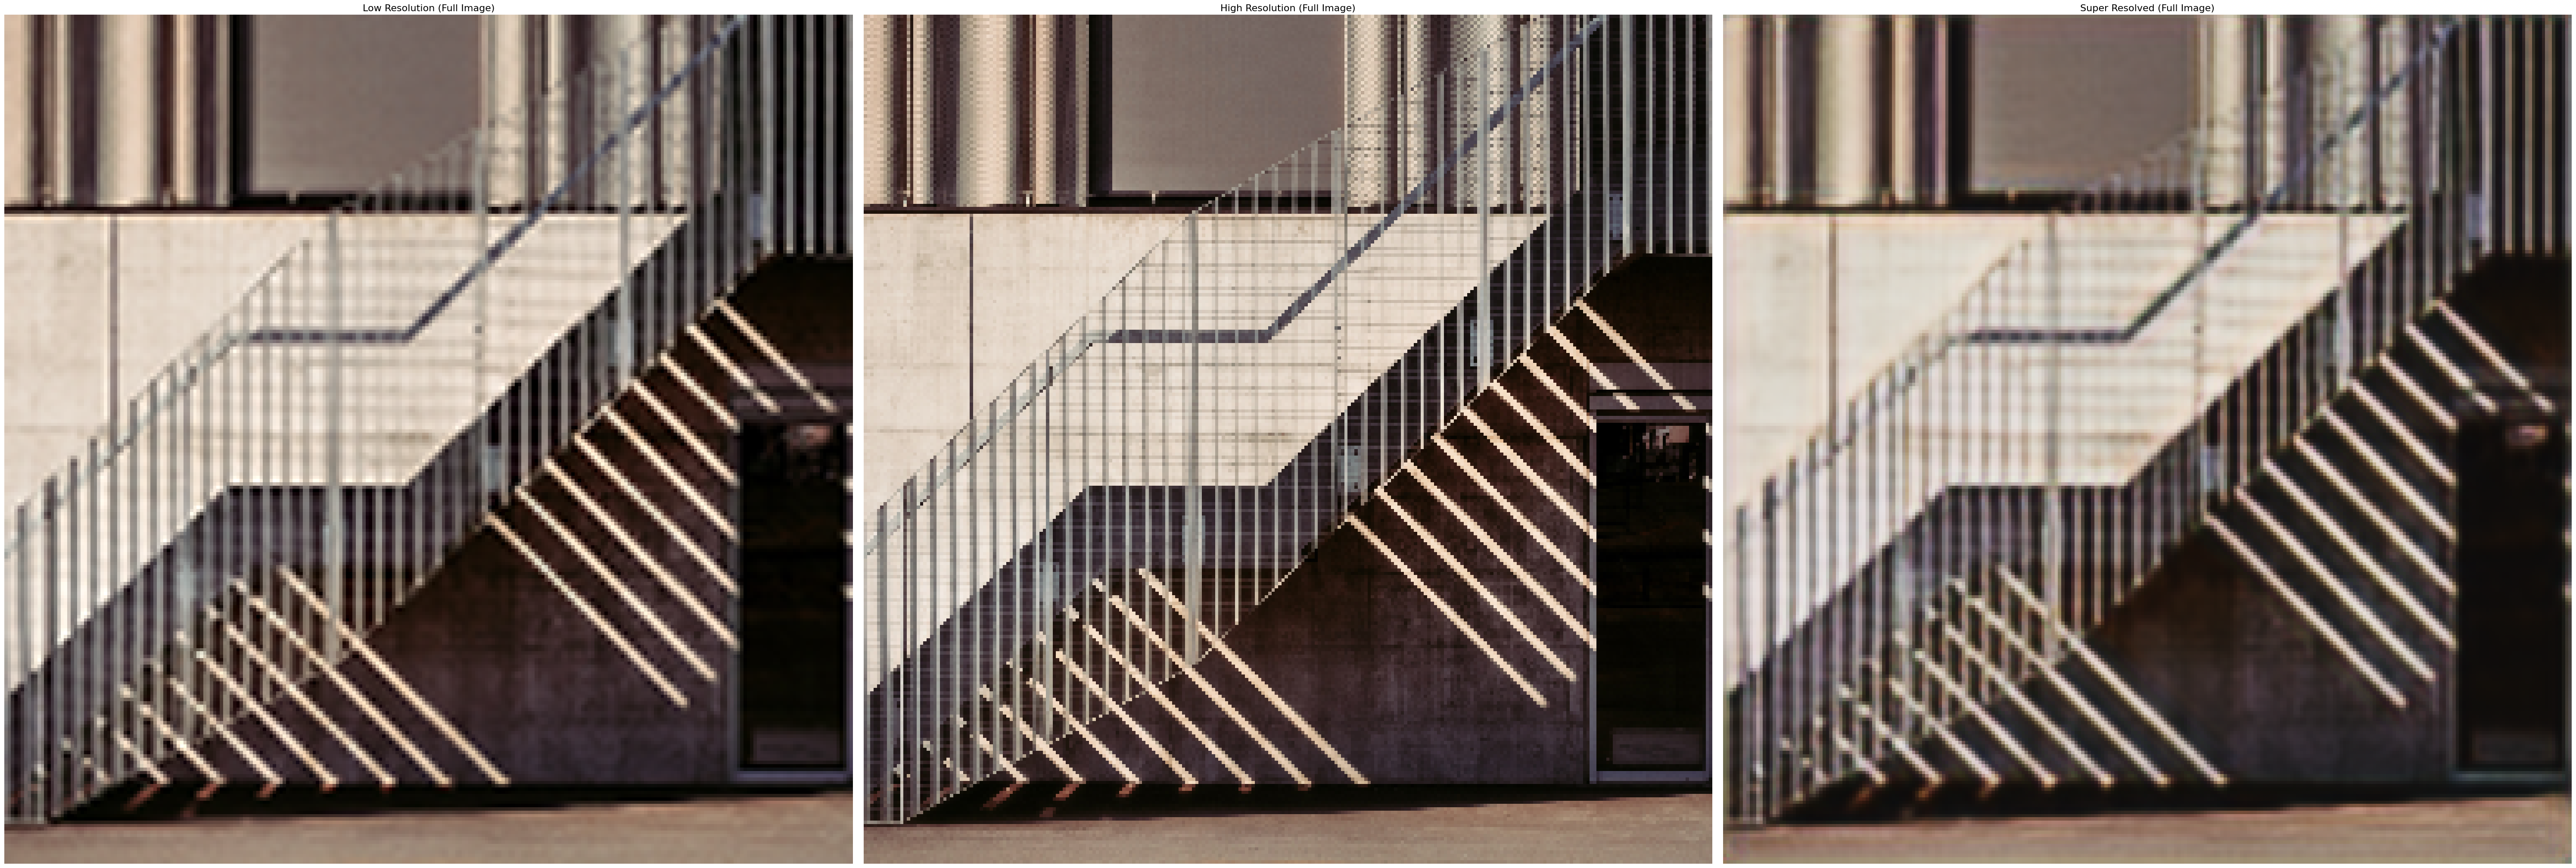

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


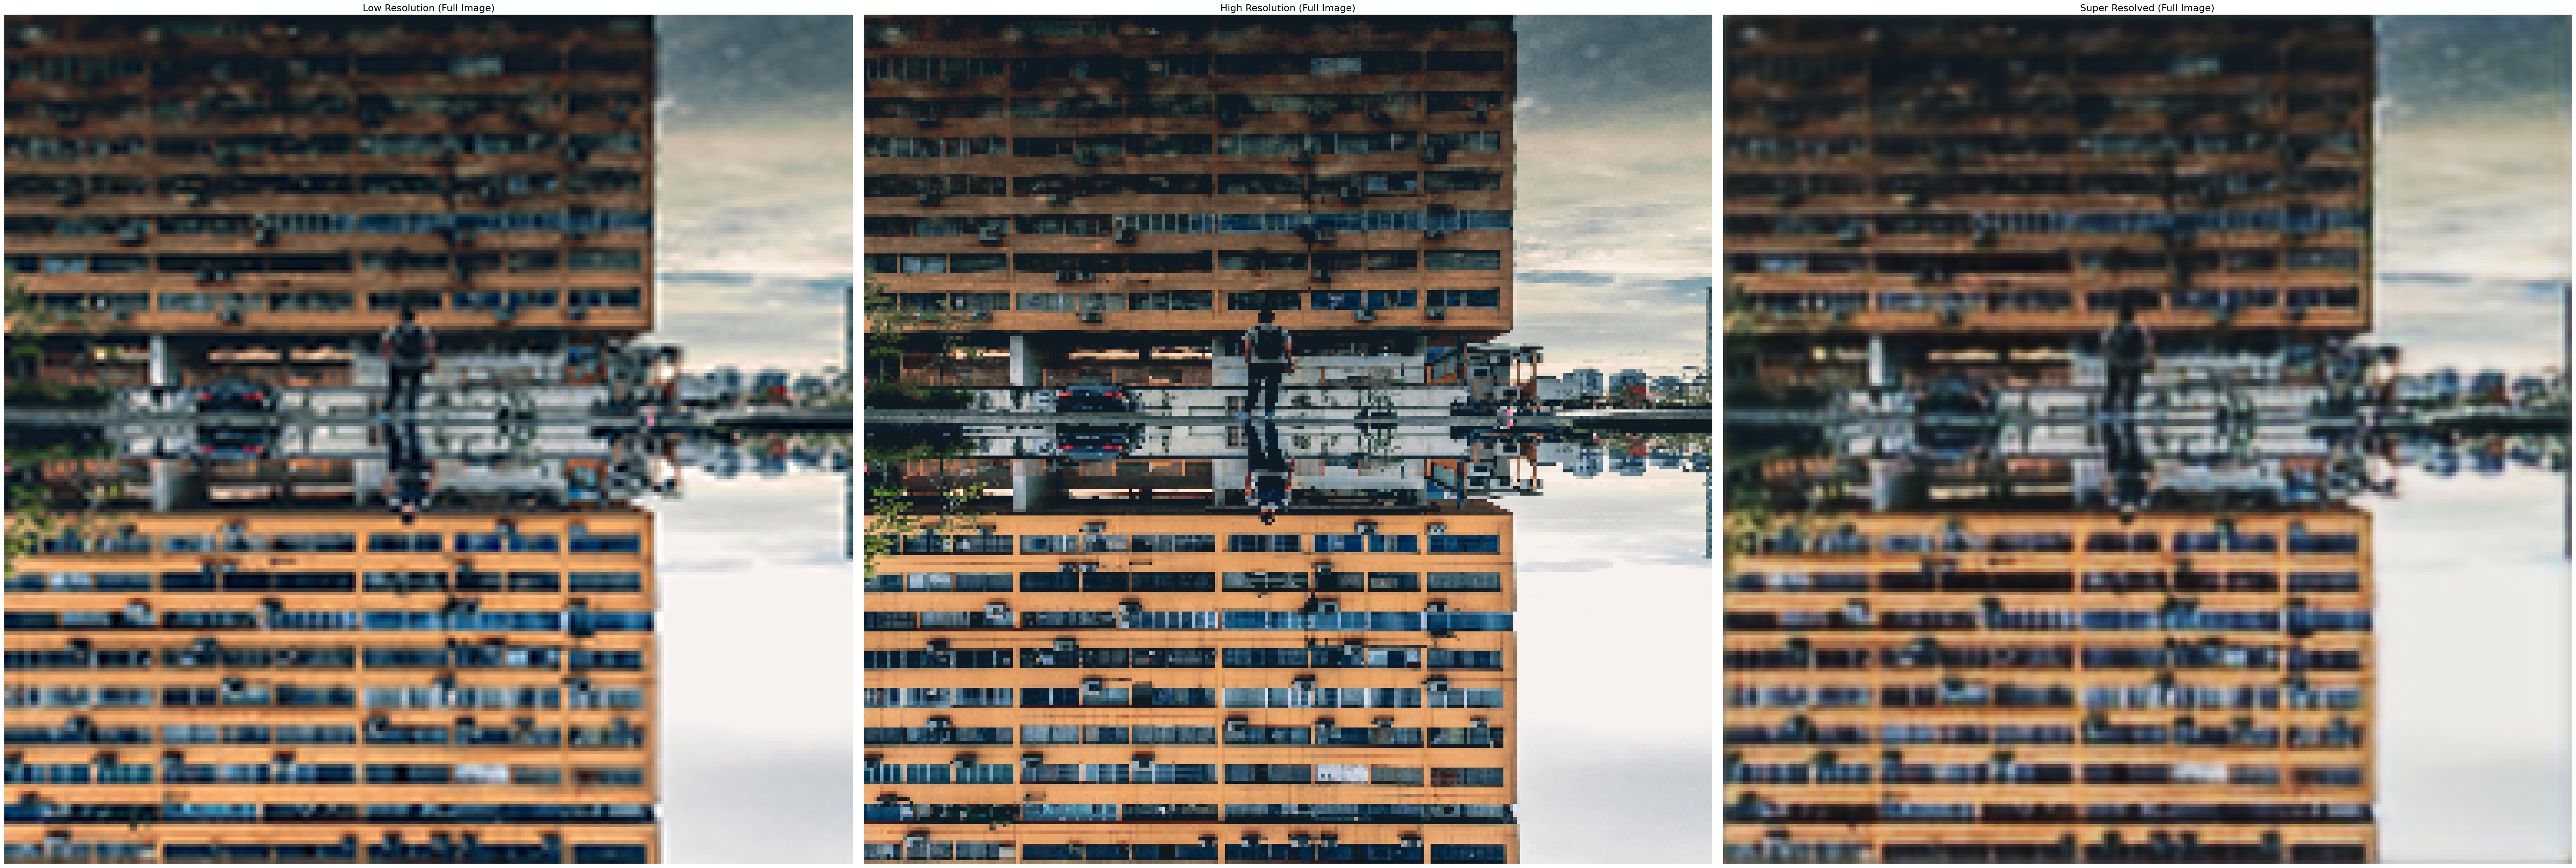

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


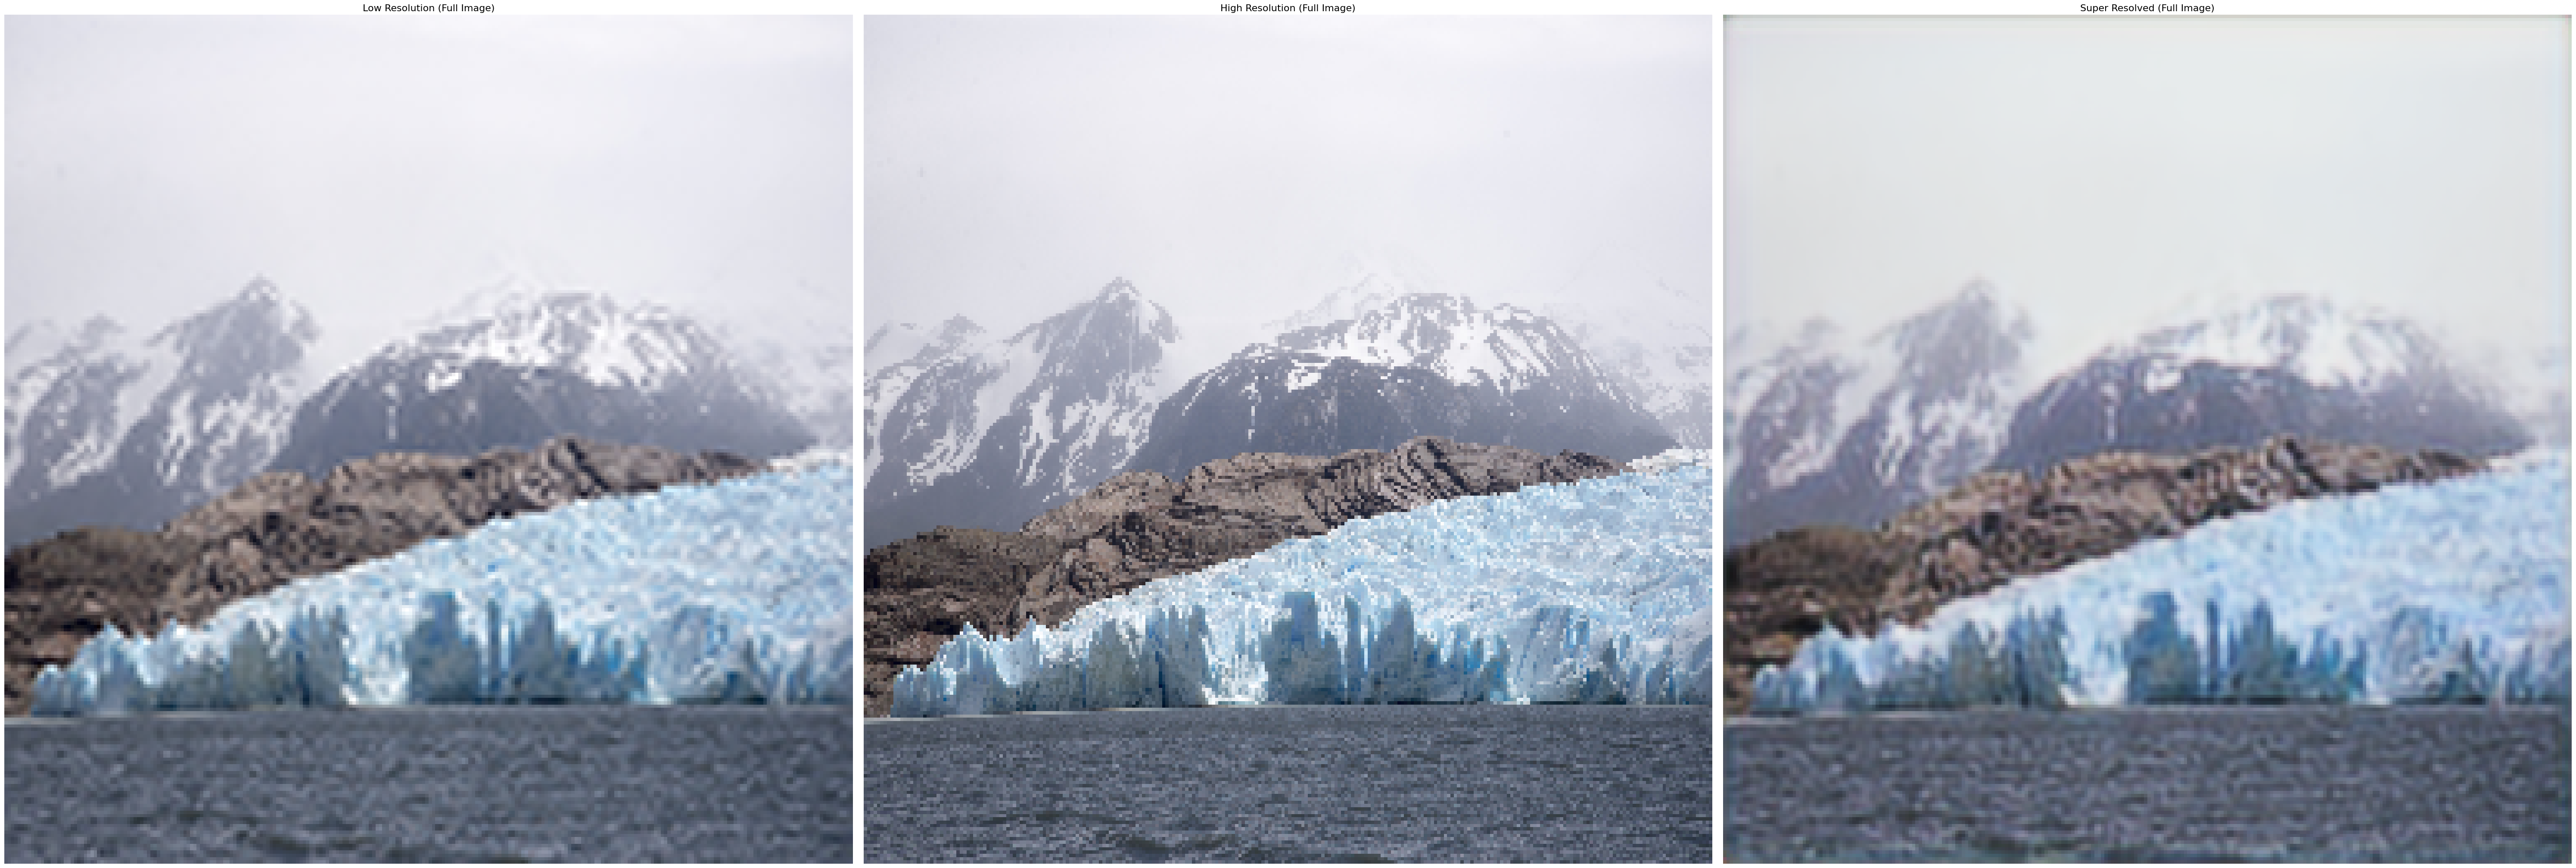

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


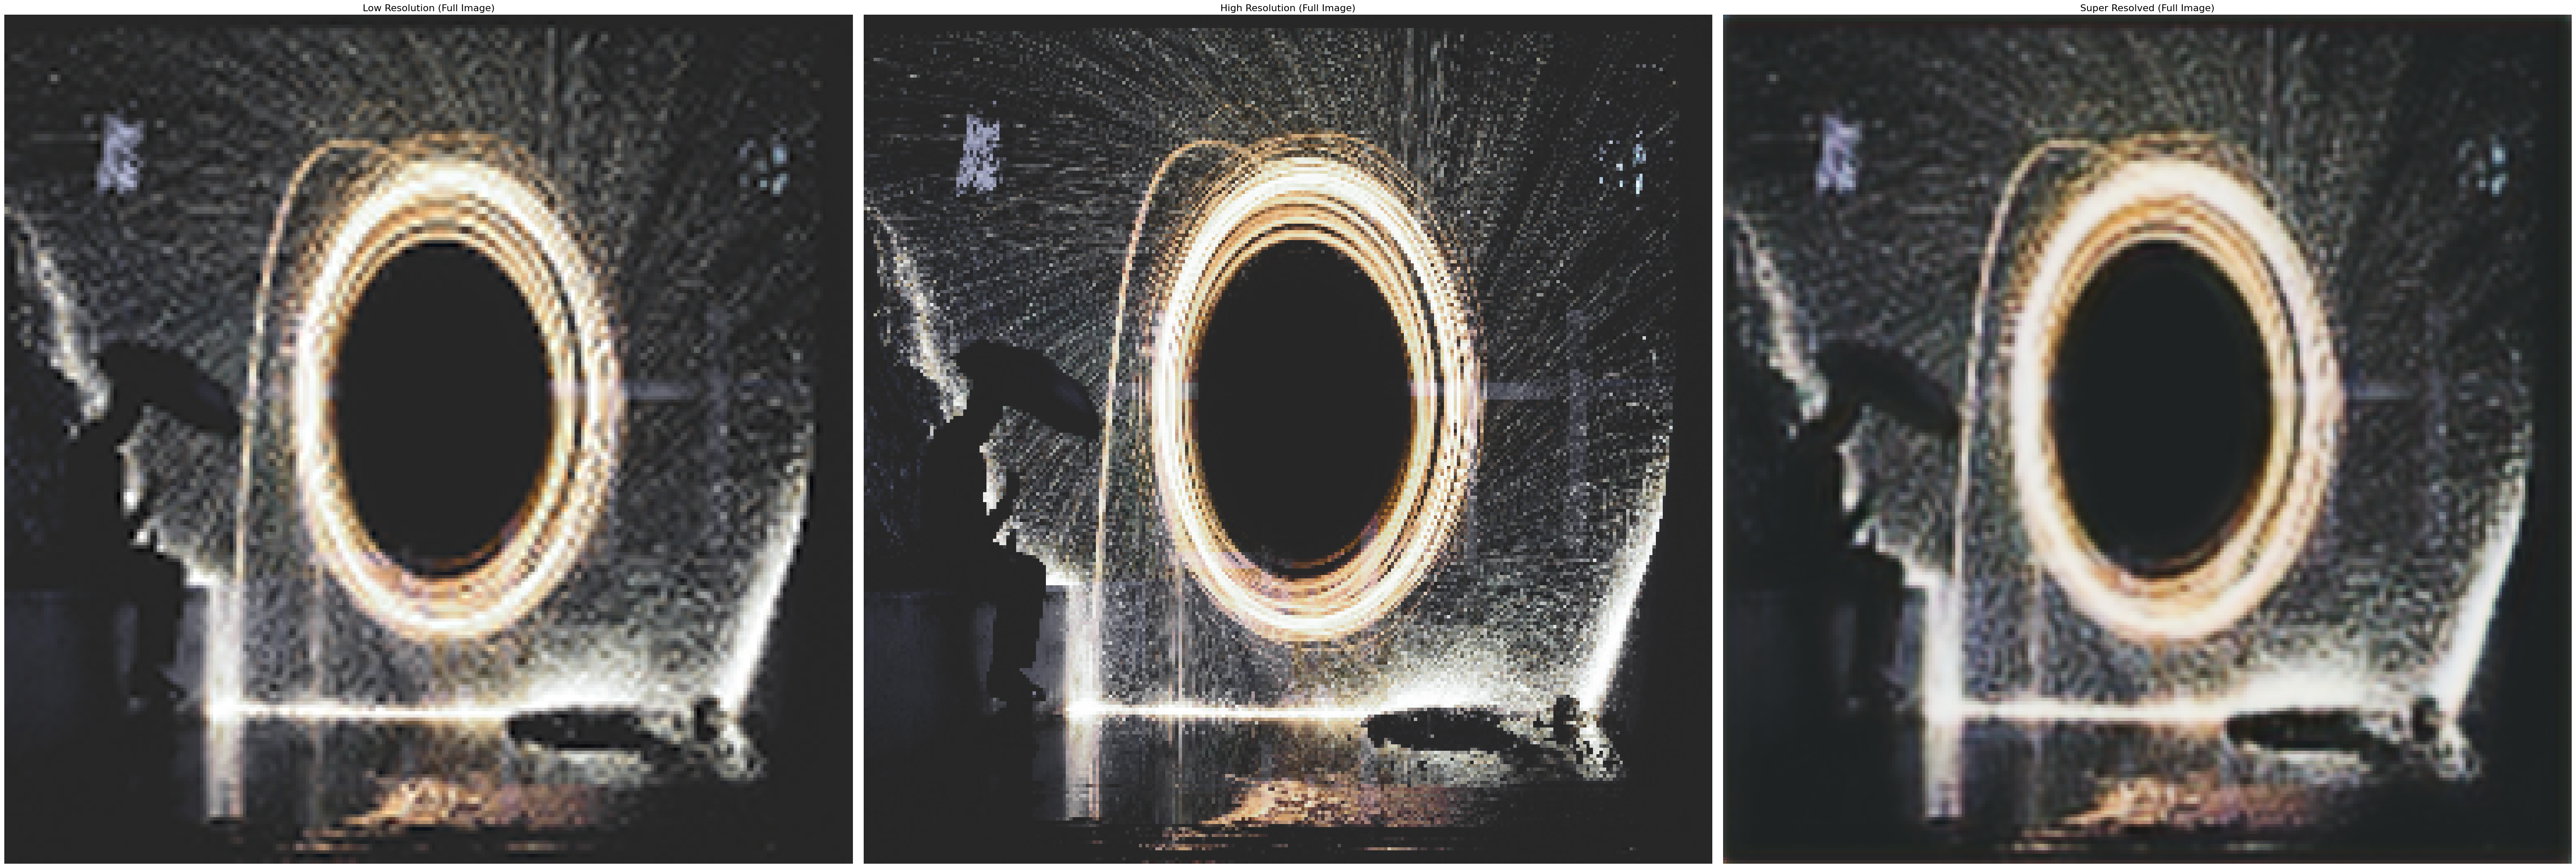

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


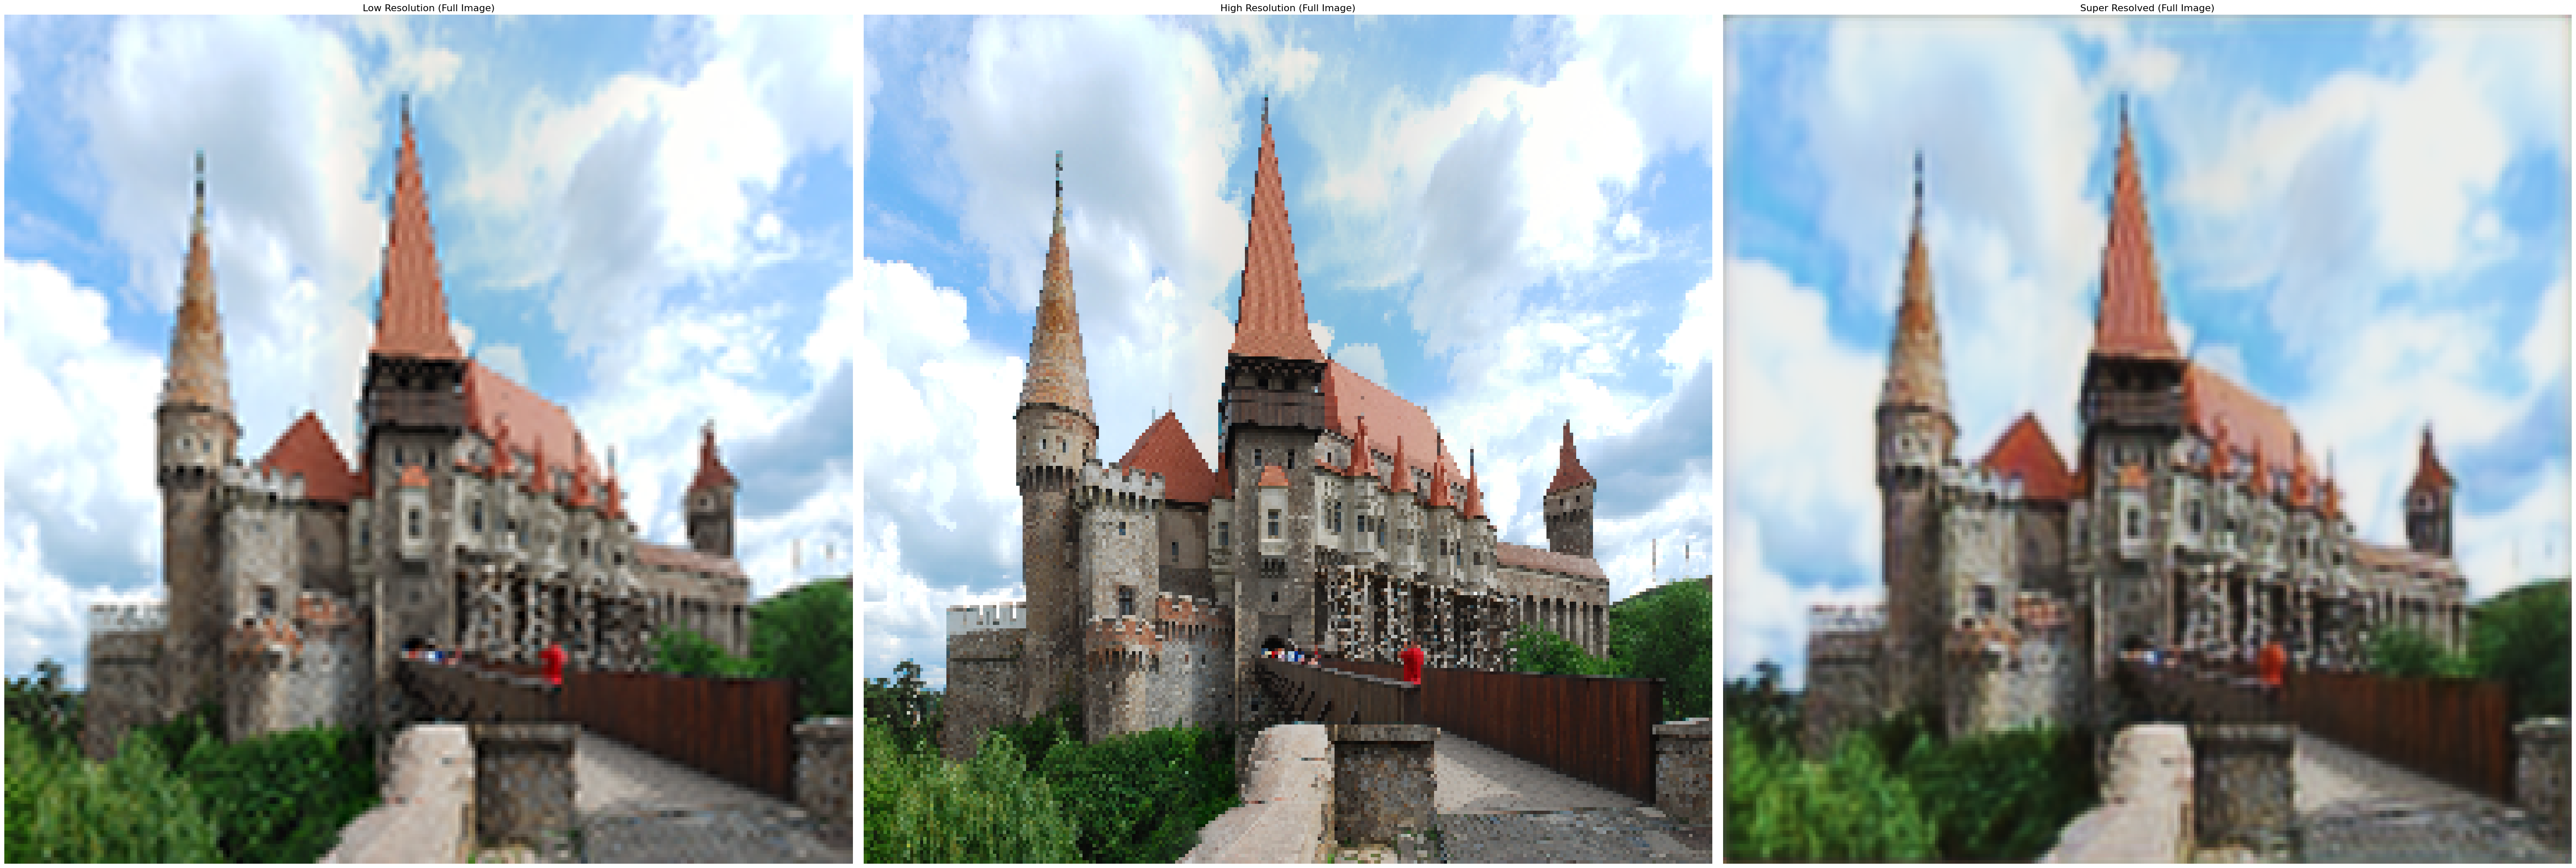

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


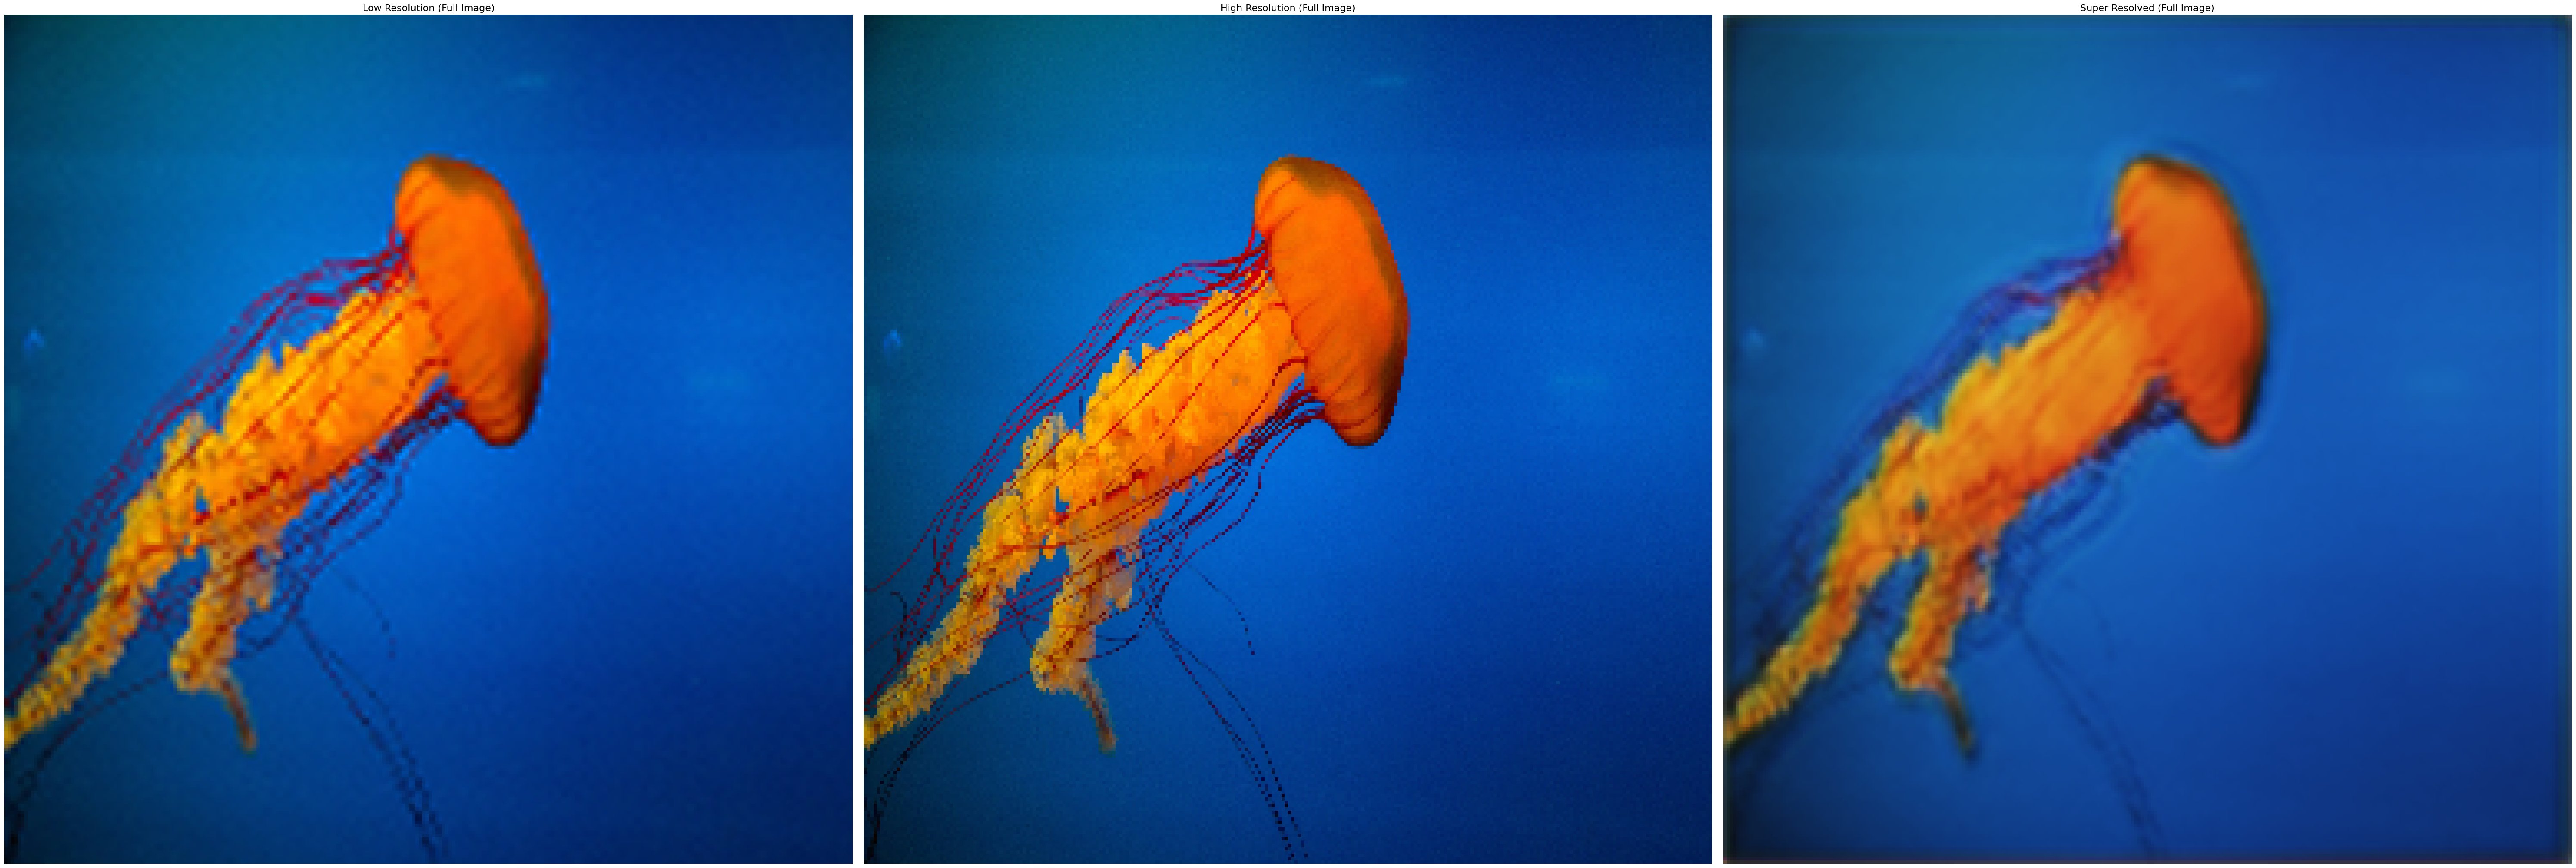

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


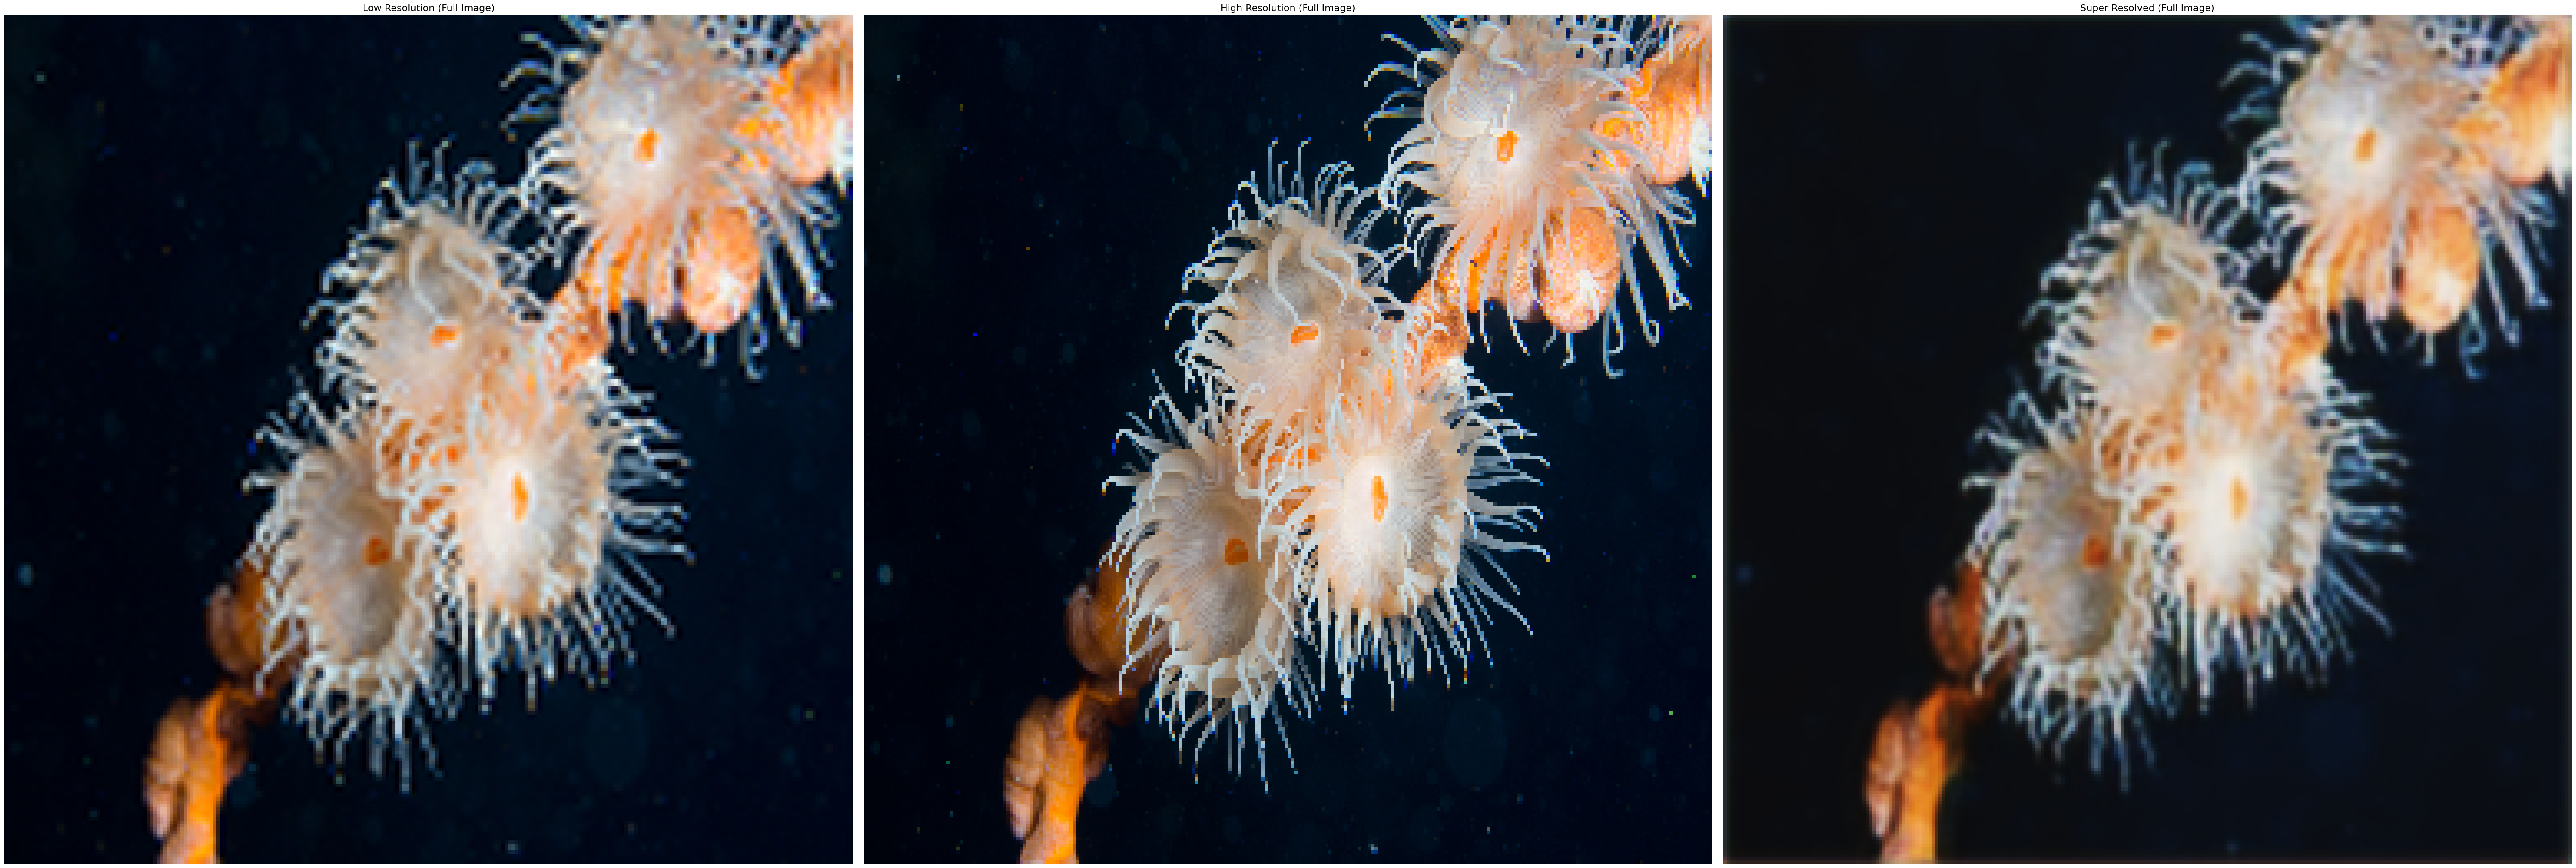

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


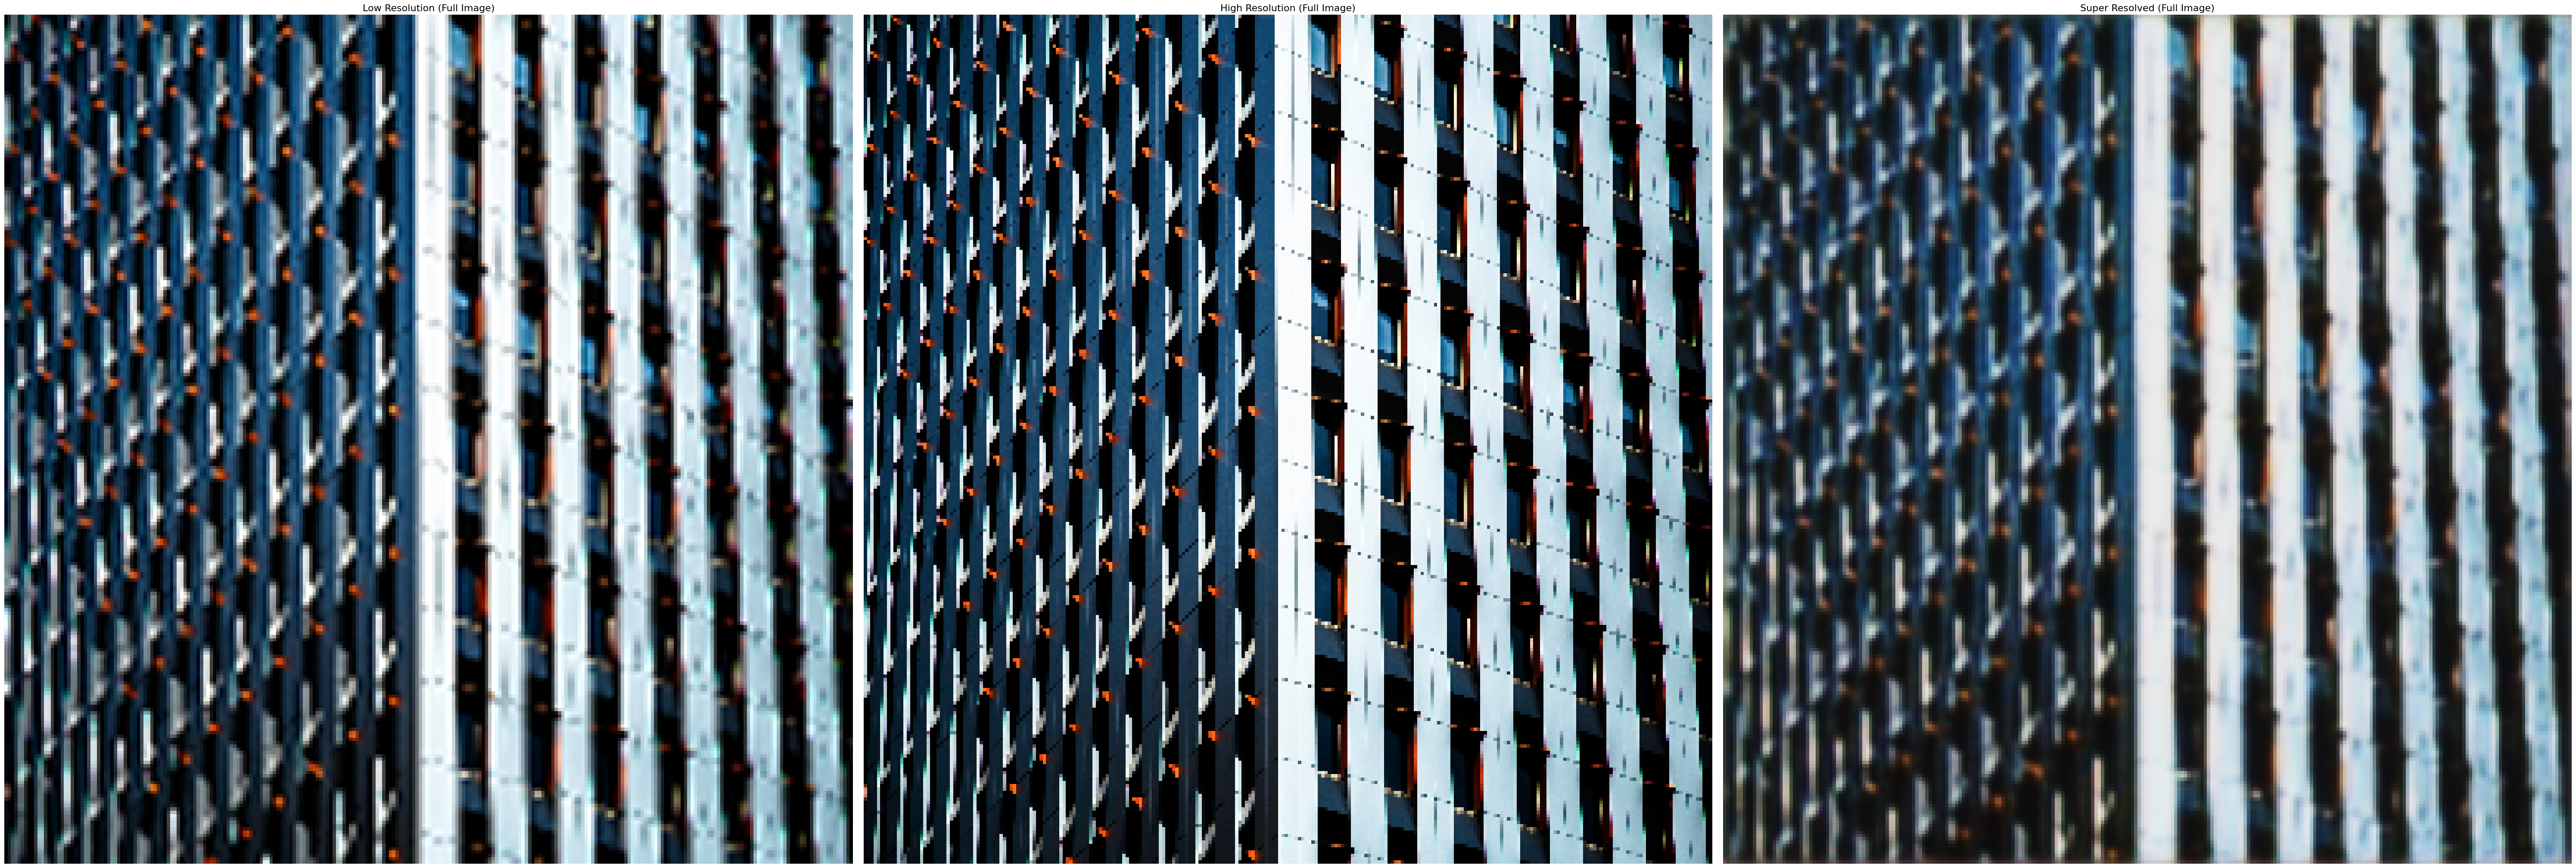

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


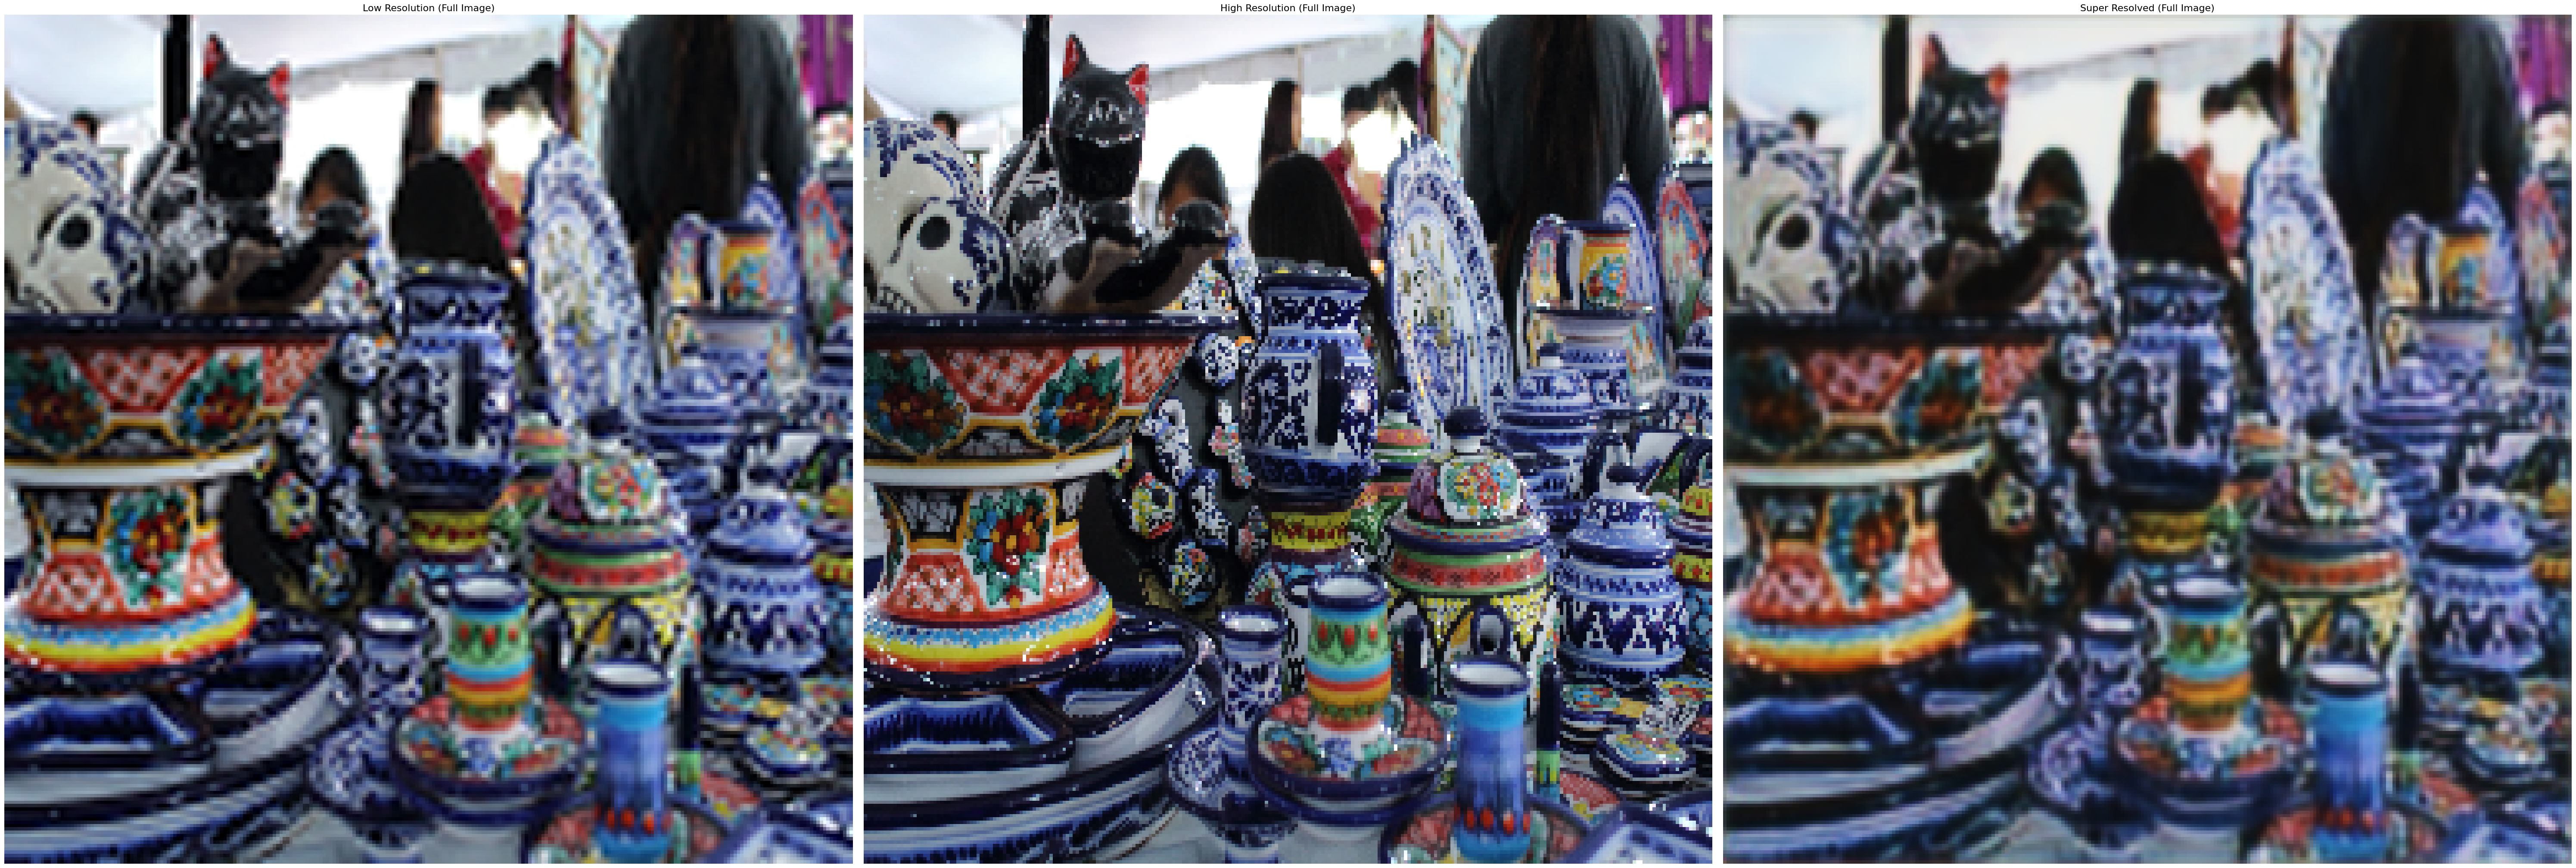

In [ ]:
def samplefull(lr_images, hr_images, index):
  # Test the model on a single full-size image
  sample_lr_full = lr_images[index]
  sample_hr_full = hr_images[index]
  sample_sr_full = srcnn.predict(np.expand_dims(sample_lr_full, axis=0))[0]

  # Ensure the output image is properly scaled to [0, 1] range
  sample_sr_full = np.clip(sample_sr_full, 0, 1).astype(np.float32)

  # Plot the result for the full-size image
  plt.figure(figsize=(60, 20))  # Adjust the figure size if 60x20 is too large
  plt.subplot(1, 3, 1)
  plt.title("Low Resolution (Full Image)", fontsize=16)
  plt.imshow(sample_lr_full)
  plt.axis('off')  # Remove axes for better visualization

  plt.subplot(1, 3, 2)
  plt.title("High Resolution (Full Image)", fontsize=16)
  plt.imshow(sample_hr_full)
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.title("Super Resolved (Full Image)", fontsize=16)
  plt.imshow(sample_sr_full)
  plt.axis('off')

  plt.tight_layout()  # Adjust layout to prevent overlapping titles
  plt.show()

for i in range(9):
  samplefull(lr_images, hr_images, i)

In [ ]:
!ls /content/


sample_data  srcnn_checkpoint.weights.h5  srcnn_final_model.h5


In [ ]:
from google.colab import files
files.download('srcnn_final_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>